In [2]:
import pandas as pd

# Load the cleaned dataset that was prepared during the data preprocessing step
df = pd.read_csv("hotel_bookings_clean.csv")

# Display a few rows to verify that the data loaded correctly
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Import the necessary machine learning and evaluation libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for consistency
sns.set(style="whitegrid")



In [4]:
# The target variable represents whether the booking was canceled (1) or not canceled (0)
y = df["is_canceled"]


In [5]:
# Select relevant columns to use as features
feature_cols = [
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "children",
    "babies",
    "is_repeated_guest",
    "previous_cancellations",
    "total_of_special_requests",
    "deposit_type",
    "customer_type",
    "market_segment"
]

X = df[feature_cols]

# Show the first few rows of the selected features
X.head()


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,total_of_special_requests,deposit_type,customer_type,market_segment
0,342,0,0,2,0.0,0,0,0,0,No Deposit,Transient,Direct
1,737,0,0,2,0.0,0,0,0,0,No Deposit,Transient,Direct
2,7,0,1,1,0.0,0,0,0,0,No Deposit,Transient,Direct
3,13,0,1,1,0.0,0,0,0,0,No Deposit,Transient,Corporate
4,14,0,2,2,0.0,0,0,0,1,No Deposit,Transient,Online TA


In [6]:
# Convert categorical variables into numerical format using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Display encoded feature set
X_encoded.head()


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,total_of_special_requests,deposit_type_Non Refund,...,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined
0,342,0,0,2,0.0,0,0,0,0,False,...,False,True,False,False,False,True,False,False,False,False
1,737,0,0,2,0.0,0,0,0,0,False,...,False,True,False,False,False,True,False,False,False,False
2,7,0,1,1,0.0,0,0,0,0,False,...,False,True,False,False,False,True,False,False,False,False
3,13,0,1,1,0.0,0,0,0,0,False,...,False,True,False,False,True,False,False,False,False,False
4,14,0,2,2,0.0,0,0,0,1,False,...,False,True,False,False,False,False,False,False,True,False


In [7]:
# Split the dataset into training and testing sets (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Check the shape of the split data
X_train.shape, X_test.shape


((69896, 21), (17474, 21))

In [8]:
# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training dataset
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [9]:
# Predict cancellation values for test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7718896646446148


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     12670
           1       0.69      0.31      0.43      4804

    accuracy                           0.77     17474
   macro avg       0.74      0.63      0.64     17474
weighted avg       0.76      0.77      0.74     17474



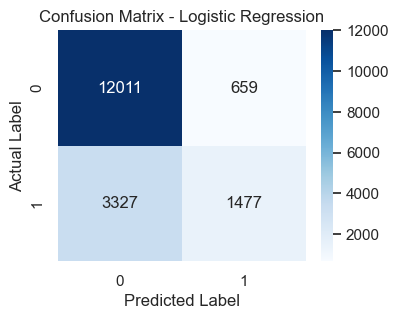

In [10]:
# Display precision, recall, and F1-score for each class
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for a clearer understanding
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
